# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

lat = []
lng = []
city_id = []
wind = []
hum = []
max_tmp = []
country = []
cloudiness = []
city_name = []
date = []

for city in cities:
    try:
        query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
        response = requests.get(query_url).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        hum.append(response['main']['humidity'])
        max_tmp.append(response['main']['temp_max'])
        country.append(response['sys']['country'])
        city_id.append(response['id'])
        city_name.append(response['name'])
        date.append(response['dt'])
        #print(f"Processing {cities[city]} | {city}")
    except: KeyError 
        
       #print(f"No data returnd for " {city}: "skipping.")
        
        
    
    print(city)


jamame
kroya
amalfi
usinsk
barra do garcas
atuona
busselton
amderma
new norfolk
rikitea
umm lajj
punta arenas
bambous virieux
east london
klaksvik
nyurba
felidhoo
thinadhoo
dandong
kyabe
anadyr
mataura
port alfred
kuche
ilulissat
saint-paul
naze
barrow
tasiilaq
we
abomsa
lamut
khatanga
magaria
albany
grand-santi
nome
taolanaro
victoria
provideniya
attawapiskat
komsomolskiy
falealupo
hualmay
beidao
aquiraz
bluff
thompson
arraial do cabo
nikolskoye
mehamn
tessalit
walvis bay
hithadhoo
qaanaaq
sao joao da barra
alofi
mathathane
tiksi
saint george
luderitz
tuktoyaktuk
abiy adi
nanyang
pisco
fortuna
vostochnyy
yellowknife
hilo
hobart
alyangula
carnarvon
umzimvubu
gondanglegi
cherskiy
gamba
bluefields
lagoa
dudinka
kruisfontein
vaini
ponta do sol
mar del plata
rostaq
bubaque
touros
fairbanks
diamantino
alice springs
olafsvik
jamestown
bijar
chuy
eydhafushi
porto novo
tomatlan
avarua
lompoc
gravdal
nova olimpia
comodoro rivadavia
san rafael
belushya guba
kavieng
anacortes
castro
simpang
port 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City Name": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": hum,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temperature": max_tmp,
    "Wind Speed": wind
    
}

weather_df = pd.DataFrame(weather_dict)

weather_df.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Jamame,100,SO,1579753577,85,0.07,42.75,80.47,22.68
1,Kroya,70,ID,1579753577,58,-7.63,109.25,91.02,1.45
2,Amalfi,100,CO,1579753440,99,6.91,-75.08,64.51,1.57
3,Usinsk,100,RU,1579753577,95,65.99,57.53,13.28,9.28
4,Barra do Garcas,100,BR,1579753578,94,-15.89,-52.26,72.82,3.40


In [5]:
south_forgets = weather_df.loc[weather_df["Latitude"]<= 0, :]

south_forgets.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
1,Kroya,70,ID,1579753577,58,-7.63,109.25,91.02,1.45
4,Barra do Garcas,100,BR,1579753578,94,-15.89,-52.26,72.82,3.40
5,Atuona,74,PF,1579753170,70,-9.80,-139.03,81.19,9.71
6,Busselton,100,AU,1579753094,29,-33.65,115.33,82.99,8.21
7,New Norfolk,75,AU,1579753519,72,-42.78,147.06,66.99,9.17


In [6]:
north_remembers = weather_df.loc[weather_df["Latitude"] >= 0, :]


north_remembers.head()

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Jamame,100,SO,1579753577,85,0.07,42.75,80.47,22.68
2,Amalfi,100,CO,1579753440,99,6.91,-75.08,64.51,1.57
3,Usinsk,100,RU,1579753577,95,65.99,57.53,13.28,9.28
9,Umm Lajj,0,SA,1579753451,33,25.02,37.27,52.16,12.19
13,Klaksvik,100,FO,1579753218,81,62.23,-6.59,44.60,23.04


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

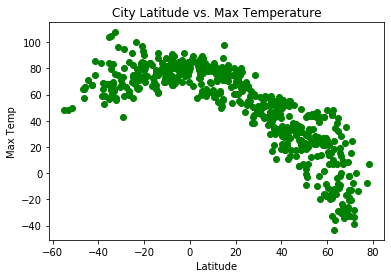

In [7]:
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.scatter(weather_df[["Latitude"]], weather_df[["Max Temperature"]], marker="o", color="green")
plt.show()

#### Latitude vs. Humidity Plot

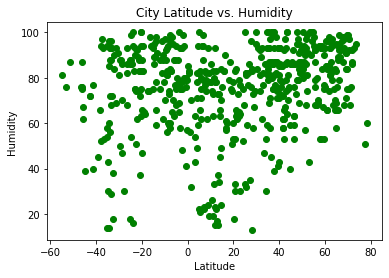

In [8]:
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(weather_df[["Latitude"]], weather_df[["Humidity"]], marker="o", color="green")
plt.show()

#### Latitude vs. Cloudiness Plot

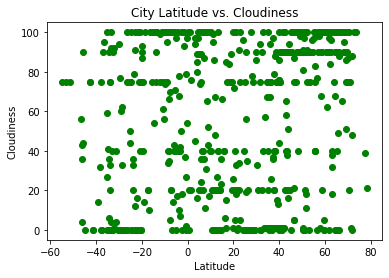

In [9]:
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(weather_df[["Latitude"]], weather_df[["Cloudiness"]], marker="o", color="green")
plt.show()

#### Latitude vs. Wind Speed Plot

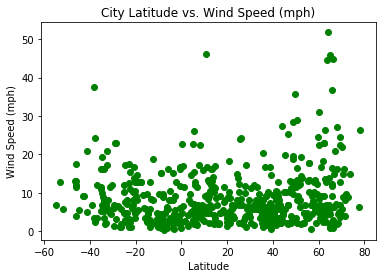

In [10]:
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(weather_df[["Latitude"]], weather_df[["Wind Speed"]], marker="o", color="green")
plt.show()

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots


In [12]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

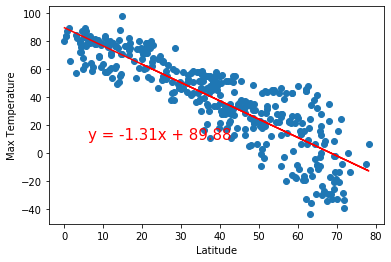

In [13]:
x_values = north_remembers['Latitude']
y_values = north_remembers['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

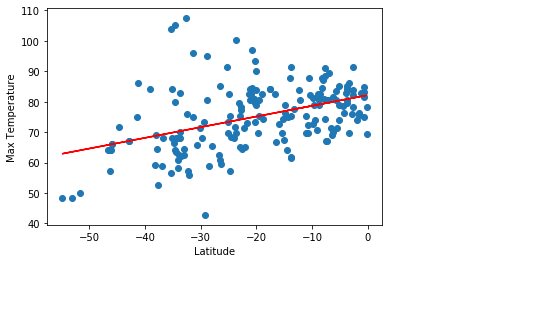

In [14]:
x_values = south_forgets['Latitude']
y_values = south_forgets['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

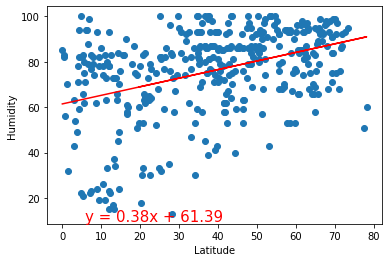

In [15]:
x_val = north_remembers['Latitude']
y_val = north_remembers['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

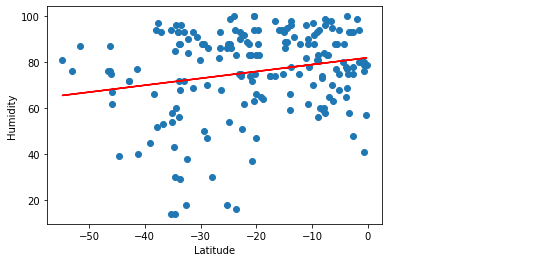

In [16]:
x_values = south_forgets['Latitude']
y_values = south_forgets['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

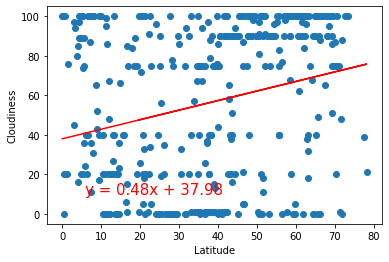

In [17]:
x_val = north_remembers['Latitude']
y_val = north_remembers['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

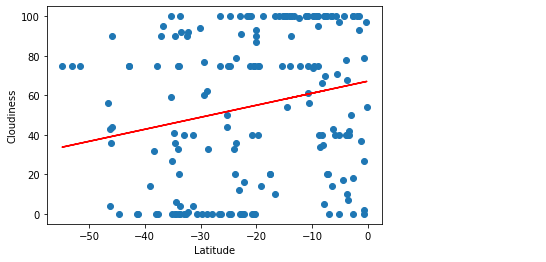

In [18]:
x_val = south_forgets['Latitude']
y_val = south_forgets['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_val = north_remembers['Latitude']
y_val = north_remembers['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_val = south_forgets['Latitude']
y_val = south_forgets['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()